In [17]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#load Dataset
df=pd.read_csv("C:/Users/TestFix123/OneDrive/Desktop/Priyanshu Kumari_CuvetteDS/Priyanshu Kumari_Machine Learning/hotel_bookings.csv" )

In [19]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1. Data Cleaning and Preprocessing
## 1.1. Missing Data Handling

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [21]:
#checking for nulls
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [22]:
#there are 3 columns with missing values; lets find the % if it is more than 40% which surely it will be we will have to drop it
(df.isnull().sum()[df.isnull().sum()/df.shape[0]*10000>40])[:]

country       488
agent       16340
company    112593
dtype: int64

In [23]:
# Scince the % of missing value is more than 40% we need to fill the null values with mean/mode I will go with mean
df = df.fillna(df.mean(numeric_only=True))
df.isnull().sum()
# still country is left

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [24]:
# check again
(df.isnull().sum()[df.isnull().sum()/df.shape[0]*10000>40])[:]
# since we cant predict nulls here in country we will drop it as it is non numeric and fill it with mode gives lots of duplicated rows
df = df.dropna()
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [25]:
# lets check for duplicate values
df.duplicated().sum()

np.int64(31958)

In [26]:
#drop duplicated values
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [27]:
df.size

2782208

## 1.2. Outlier Detection

In [28]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000,86944.000000
mean,0.275936,80.189823,2016.211768,26.841726,15.817595,1.007384,2.628727,1.878543,0.139209,0.010835,0.039232,0.030226,0.176700,0.271842,92.942423,188.923385,0.753462,106.571263,0.083445,0.699485
std,0.446987,86.099761,0.686049,13.654240,8.834531,1.028757,2.043744,0.625858,0.456776,0.113590,0.194148,0.369566,1.717846,0.728076,105.137185,31.757470,10.041586,54.958962,0.280396,0.831835
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,189.266735,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,189.266735,0.000000,98.400000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,189.266735,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [29]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [30]:
#we need numerical columns for outliers; for its detection and treatment
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


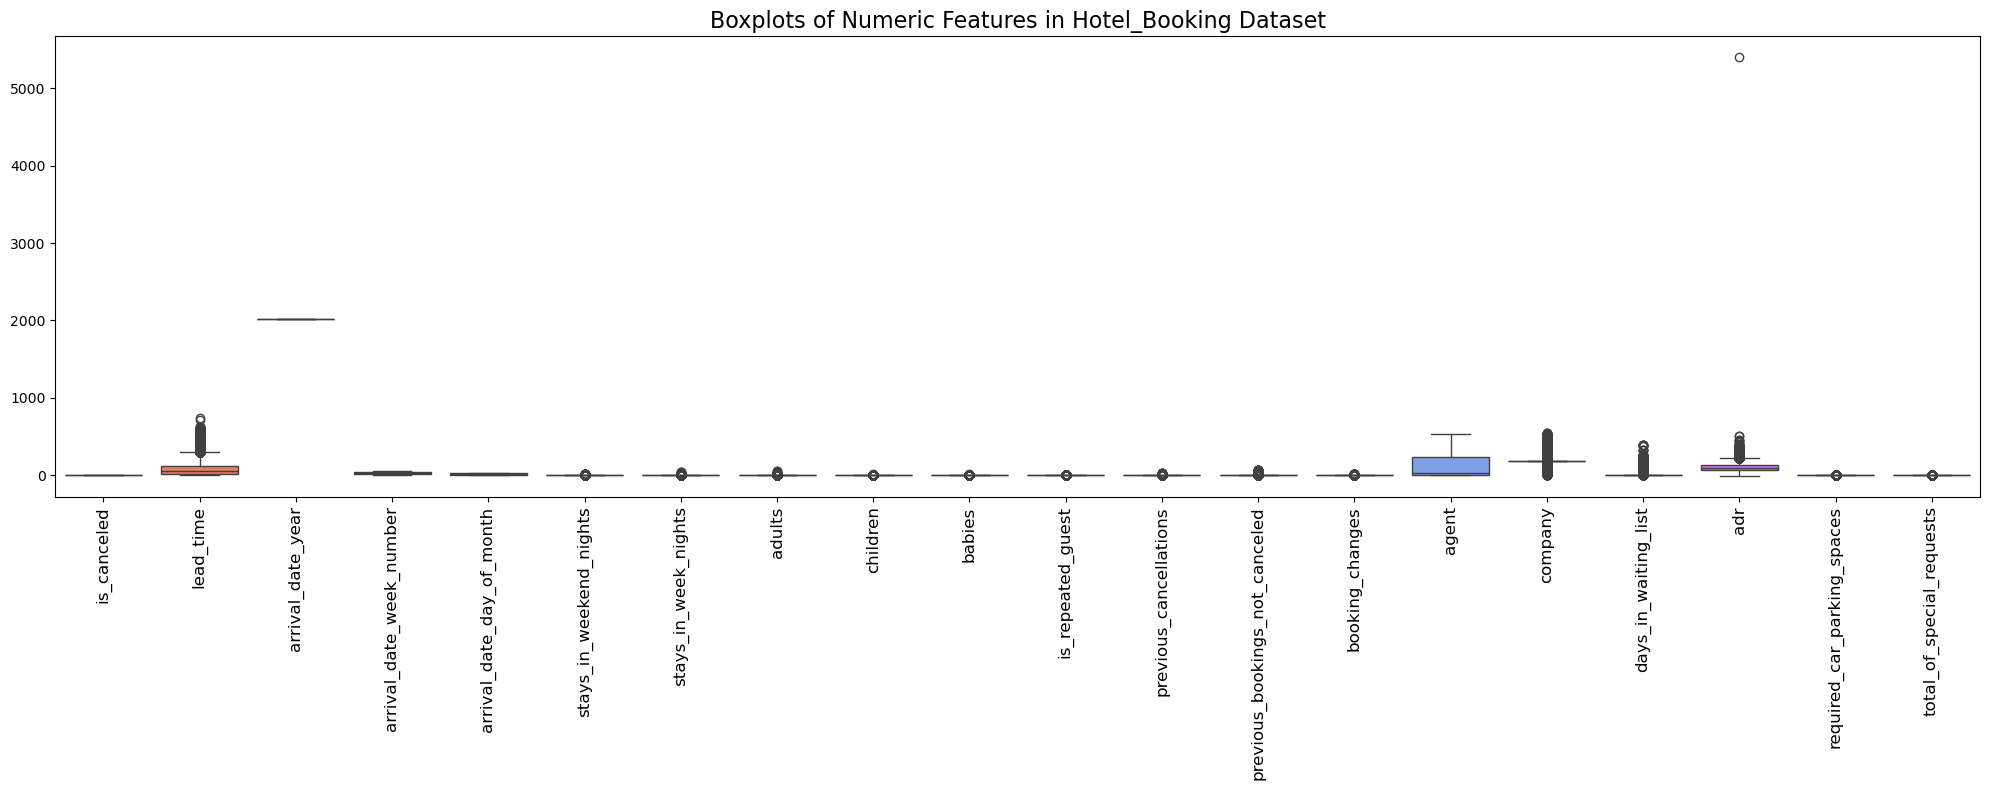

In [31]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create the boxplot to view outliers
plt.figure(figsize=(20, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90, fontsize=12)
plt.title('Boxplots of Numeric Features in Hotel_Booking Dataset', fontsize=16)
plt.tight_layout()
plt.show()


Processing column: is_canceled


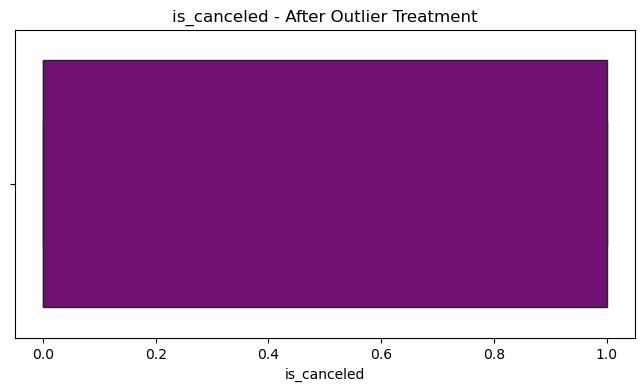

Processing column: lead_time


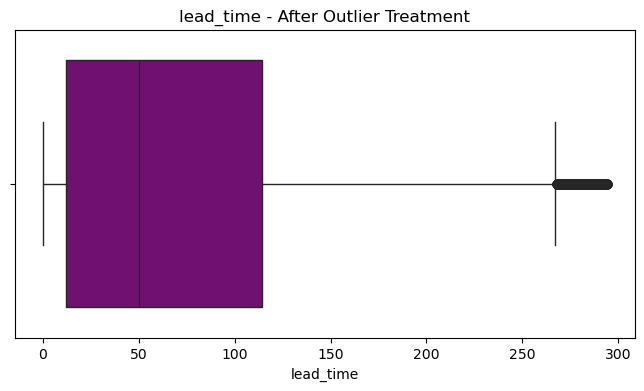

Processing column: arrival_date_year


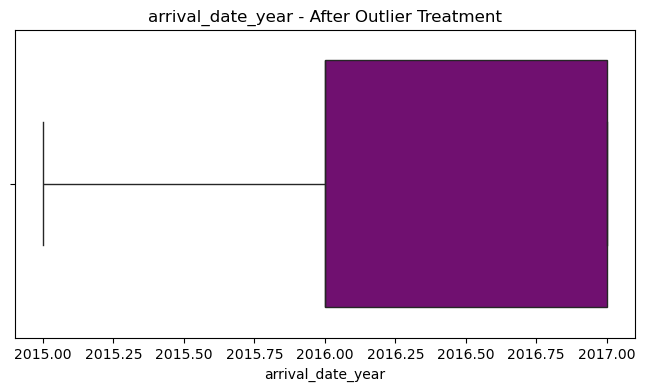

Processing column: arrival_date_week_number


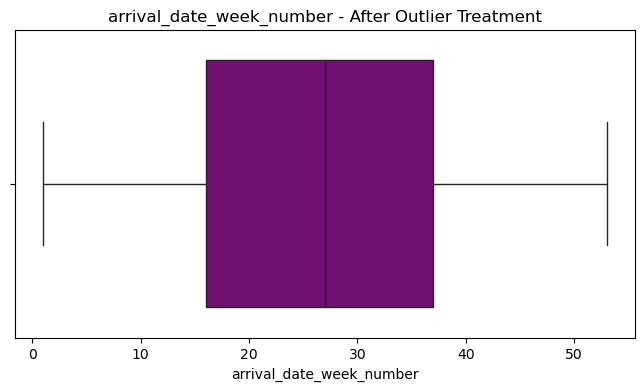

Processing column: arrival_date_day_of_month


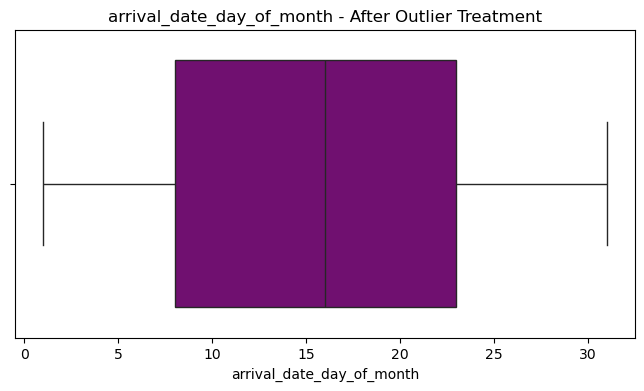

Processing column: stays_in_weekend_nights


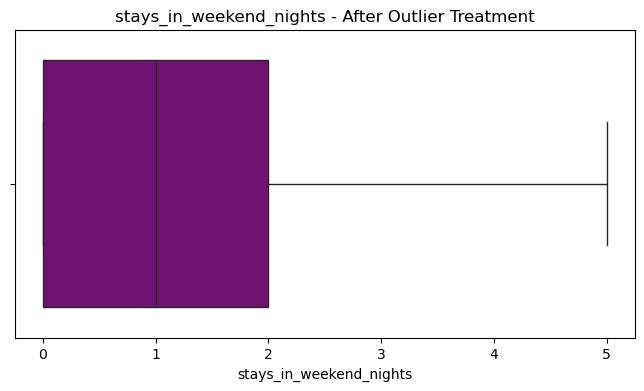

Processing column: stays_in_week_nights


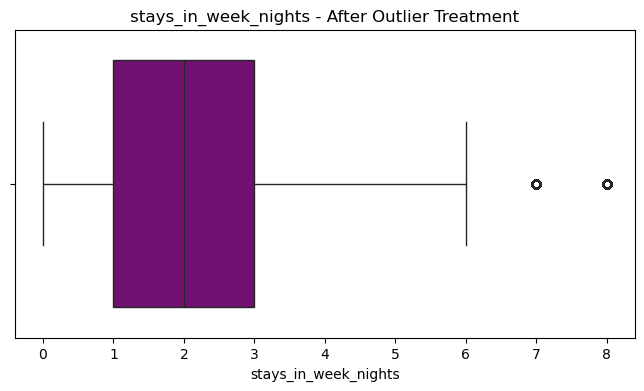

Processing column: adults


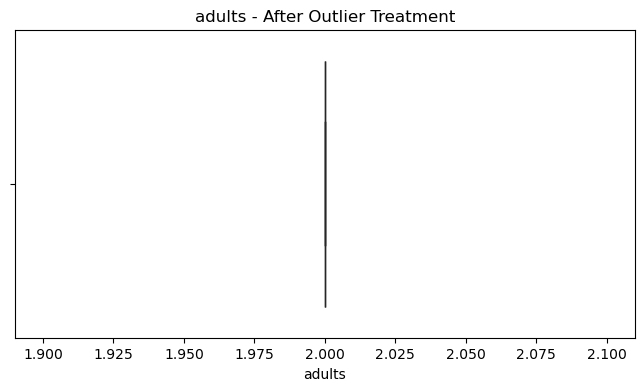

Processing column: children


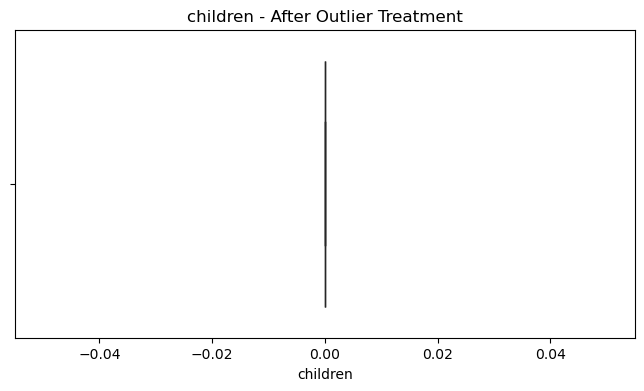

Processing column: babies


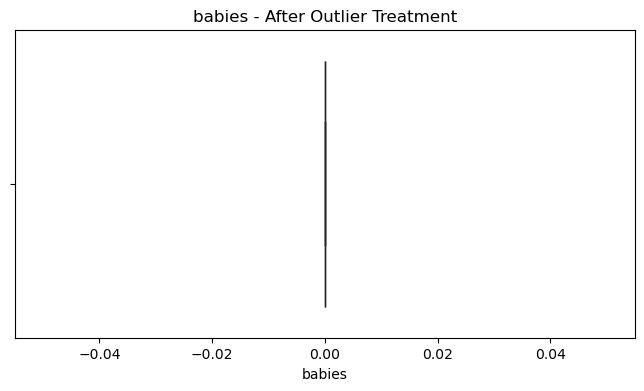

Processing column: is_repeated_guest


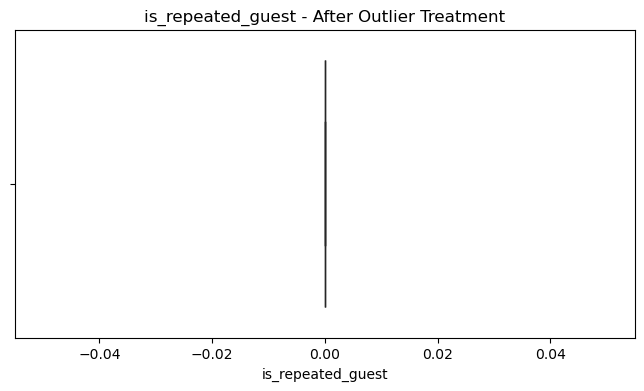

Processing column: previous_cancellations


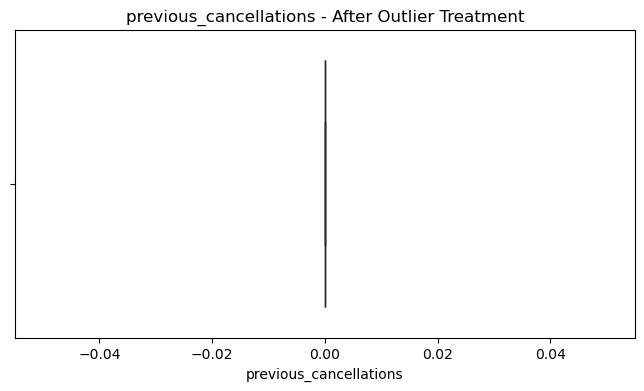

Processing column: previous_bookings_not_canceled


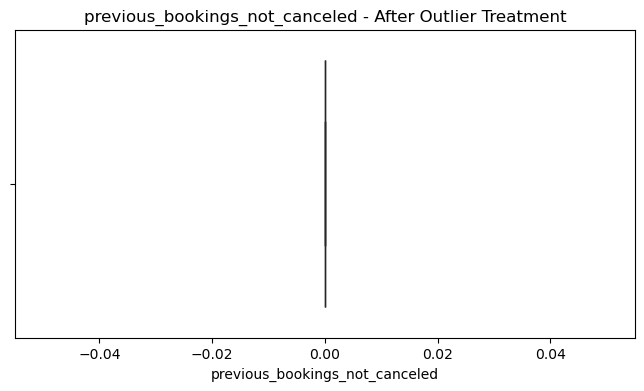

Processing column: booking_changes


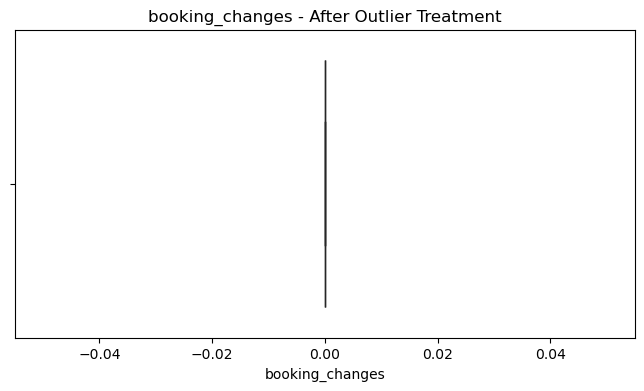

Processing column: agent


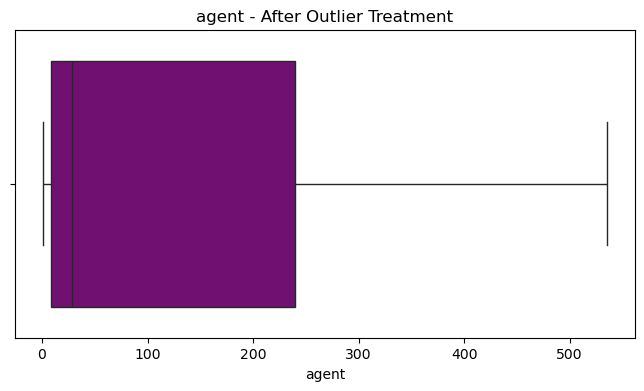

Processing column: company


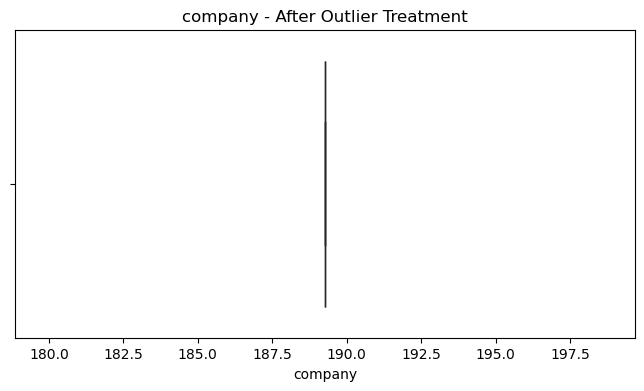

Processing column: days_in_waiting_list


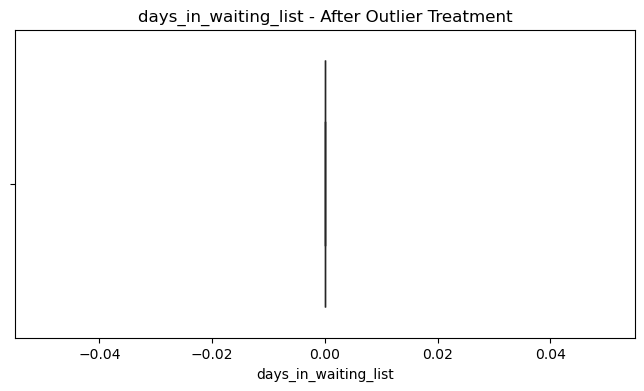

Processing column: adr


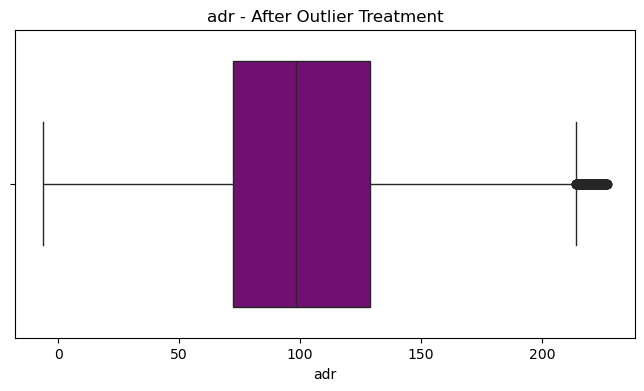

Processing column: required_car_parking_spaces


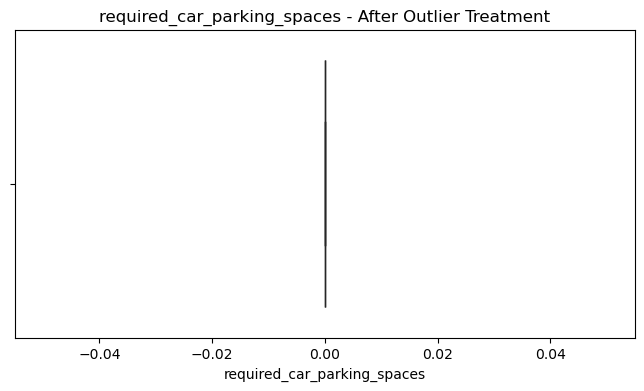

Processing column: total_of_special_requests


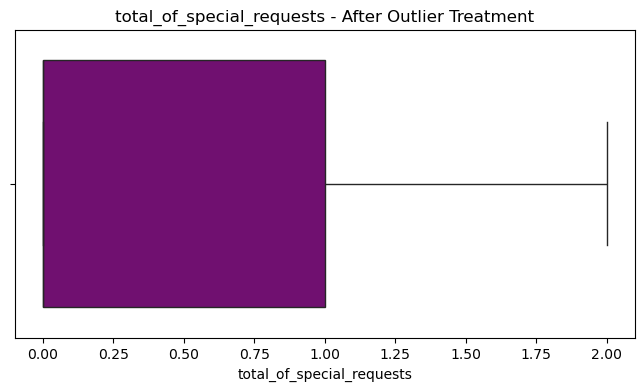

In [32]:
#treating outliers
def outlier_treatment(df):
    # Specified columns for outlier treatment
    specified_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for column in specified_columns:
        print(f"Processing column: {column}")
        
        # Calculate IQR, lower and upper bounds
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the median
        median_value = df[column].median()
        df[column] = df[column].apply(
            lambda x: median_value if x < lower_bound or x > upper_bound else x
        )

        # Box plot after treatment
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column], color='purple')
        plt.title(f"{column} - After Outlier Treatment")
        plt.show()
    
    return df

df_cleaned = outlier_treatment(df)

## 1.3. Data Type Conversion

In [33]:
print(df.dtypes)

hotel                              object
is_canceled                         int64
lead_time                         float64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights           float64
stays_in_week_nights              float64
adults                            float64
children                          float64
babies                            float64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                 float64
previous_cancellations            float64
previous_bookings_not_canceled    float64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                   float64
deposit_type                       object
agent                             

In [34]:
# Convert date columns
date_cols = ['reservation_status_date', 'arrival_date_year']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

print(df.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                float64
arrival_date_year                 datetime64[ns]
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                  float64
stays_in_week_nights                     float64
adults                                   float64
children                                 float64
babies                                   float64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                        float64
previous_cancellations                   float64
previous_bookings_not_canceled           float64
reserved_room_type                        object
assigned_room_type  

# 2. Feature Engineering
## 2.1. Feature Scaling

In [35]:
import os
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

#scale it by creating the object for MinMaxScaler named scaler
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

display(df[num_cols].head())

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.0,0.170068,0.5,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160474,0.0,0.0,0.027356,0.0,0.0
1,0.0,0.170068,0.5,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160474,0.0,0.0,0.027356,0.0,0.0
2,0.0,0.023810,0.5,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160474,0.0,0.0,0.348941,0.0,0.0
3,0.0,0.044218,0.5,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.567416,0.0,0.0,0.348941,0.0,0.0
4,0.0,0.047619,0.5,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.447566,0.0,0.0,0.447560,0.0,0.5


## 2.2. Categorical Grouping

In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,0.170068,1970-01-01 00:00:00.000002015,July,0.5,0.0,0.0,0.000,0.0,...,No Deposit,0.160474,0.0,0.0,Transient,0.027356,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0.0,0.170068,1970-01-01 00:00:00.000002015,July,0.5,0.0,0.0,0.000,0.0,...,No Deposit,0.160474,0.0,0.0,Transient,0.027356,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0.0,0.023810,1970-01-01 00:00:00.000002015,July,0.5,0.0,0.0,0.125,0.0,...,No Deposit,0.160474,0.0,0.0,Transient,0.348941,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0.0,0.044218,1970-01-01 00:00:00.000002015,July,0.5,0.0,0.0,0.125,0.0,...,No Deposit,0.567416,0.0,0.0,Transient,0.348941,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0.0,0.047619,1970-01-01 00:00:00.000002015,July,0.5,0.0,0.0,0.250,0.0,...,No Deposit,0.447566,0.0,0.0,Transient,0.447560,0.0,0.5,Check-Out,2015-07-03


In [38]:
#categorizing lead time
def categorize_lead_time(x):
    if x < 30:
        return "Short"
    elif x < 90:
        return "Medium"
    else:
        return "Large"

df['lead_time_group'] = df['lead_time'].apply(categorize_lead_time)

In [39]:
#encode categories
#df = pd.get_dummies(df, drop_first=True).astype(int)

In [40]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_group
0,Resort Hotel,0.0,0.170068,1970-01-01 00:00:00.000002015,July,0.5,0.0,0.0,0.000,0.0,...,0.160474,0.0,0.0,Transient,0.027356,0.0,0.0,Check-Out,2015-07-01,Short
1,Resort Hotel,0.0,0.170068,1970-01-01 00:00:00.000002015,July,0.5,0.0,0.0,0.000,0.0,...,0.160474,0.0,0.0,Transient,0.027356,0.0,0.0,Check-Out,2015-07-01,Short
2,Resort Hotel,0.0,0.023810,1970-01-01 00:00:00.000002015,July,0.5,0.0,0.0,0.125,0.0,...,0.160474,0.0,0.0,Transient,0.348941,0.0,0.0,Check-Out,2015-07-02,Short
3,Resort Hotel,0.0,0.044218,1970-01-01 00:00:00.000002015,July,0.5,0.0,0.0,0.125,0.0,...,0.567416,0.0,0.0,Transient,0.348941,0.0,0.0,Check-Out,2015-07-02,Short
4,Resort Hotel,0.0,0.047619,1970-01-01 00:00:00.000002015,July,0.5,0.0,0.0,0.250,0.0,...,0.447566,0.0,0.0,Transient,0.447560,0.0,0.5,Check-Out,2015-07-03,Short


# 3. Complex Calculation and Advanced Functions
## 3.1. Running Total Analysis

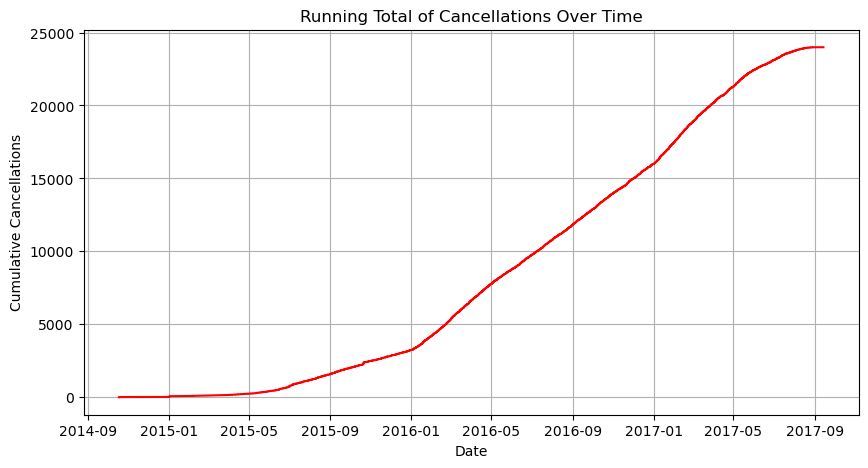

In [41]:
# first sort the reservation_status_date
df = df.sort_values(by='reservation_status_date')
# find cumulative by .cumsum
df['cumulative_cancellations'] = df['is_canceled'].cumsum()

plt.figure(figsize=(10,5))
plt.plot(df['reservation_status_date'], df['cumulative_cancellations'], color='red')
plt.title("Running Total of Cancellations Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Cancellations")
plt.grid(True)
plt.show()

## 3.2. Weighted Booking Score

73875    0.0
73876    0.0
73854    0.0
73834    0.0
73814    0.0
        ... 
40056    0.0
40055    0.0
40057    0.0
40058    0.0
40059    0.0
Name: weighted_booking_score, Length: 86944, dtype: float64


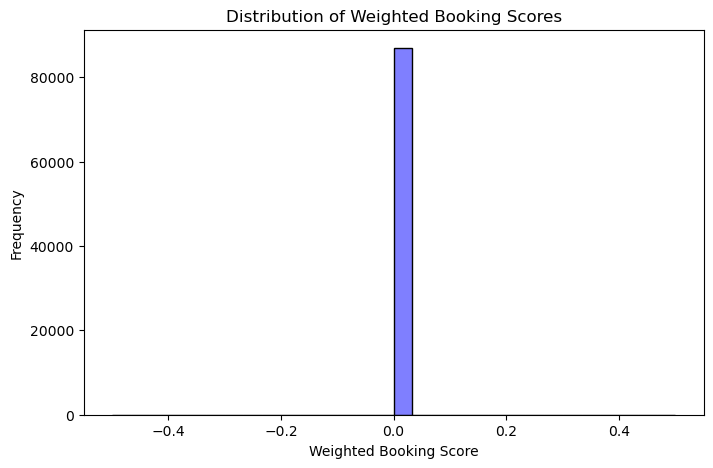

In [42]:
# compute weighted score by dividing previous_cancellations by total past bookings
df['weighted_booking_score'] = df['previous_cancellations'] / (df['previous_cancellations'] + df['previous_bookings_not_canceled'] + 1)
print(df['weighted_booking_score'])

plt.figure(figsize=(8,5))
sns.histplot(df['weighted_booking_score'], bins=30, kde=True, color='blue')
plt.title("Distribution of Weighted Booking Scores")
plt.xlabel("Weighted Booking Score")
plt.ylabel("Frequency")
plt.show()

## 3.3. Dynamic Rank Caluclation

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86944 entries, 73875 to 40059
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86944 non-null  object        
 1   is_canceled                     86944 non-null  float64       
 2   lead_time                       86944 non-null  float64       
 3   arrival_date_year               86944 non-null  datetime64[ns]
 4   arrival_date_month              86944 non-null  object        
 5   arrival_date_week_number        86944 non-null  float64       
 6   arrival_date_day_of_month       86944 non-null  float64       
 7   stays_in_weekend_nights         86944 non-null  float64       
 8   stays_in_week_nights            86944 non-null  float64       
 9   adults                          86944 non-null  float64       
 10  children                        86944 non-null  float64       
 11  bab

In [44]:
df['hotel'].unique().tolist()

['City Hotel', 'Resort Hotel']

In [45]:
# cancellation rate per hotel
df['cancellation_rate'] = df.groupby('hotel')['is_canceled'].transform('mean')
# ranking hotels dynamically(dense) based on cancellation rate
df['hotel_rank'] = df['cancellation_rate'].rank(method='dense', ascending=False)

# Group by hotel to get average cancellation rate
hotel_rankings = (df.groupby('hotel')['is_canceled'].mean().reset_index().rename(columns={'is_canceled': 'cancellation_rate'}))

hotel_rankings['hotel_rank'] = hotel_rankings['cancellation_rate'].rank(method='dense', ascending=False)
print(hotel_rankings.sort_values('hotel_rank'))

          hotel  cancellation_rate  hotel_rank
0    City Hotel           0.300344         1.0
1  Resort Hotel           0.237038         2.0


# 4. Advanced Filtering and Parameterized Visualization
## 4.1. Dynamic Market Segment Analysis

In [47]:
df['market_segment'].unique()

array(['Groups', 'Direct', 'Offline TA/TO', 'Online TA', 'Complementary',
       'Corporate', 'Undefined', 'Aviation'], dtype=object)

In [48]:
# function to analyse market segment individually
def filter_by_segment(segment):
    """Return bookings for a given market segment"""
    return df[df['market_segment'] == segment]

display(filter_by_segment('Corporate').head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_group,cumulative_cancellations,weighted_booking_score,cancellation_rate,hotel_rank
3,Resort Hotel,0.0,0.044218,1970-01-01 00:00:00.000002015,July,0.500000,0.000000,0.0,0.125,0.0,...,0.348941,0.0,0.0,Check-Out,2015-07-02,Short,740.0,0.0,0.237038,2.0
18,Resort Hotel,0.0,0.000000,1970-01-01 00:00:00.000002015,July,0.500000,0.000000,0.0,0.125,0.0,...,0.487951,0.0,0.0,Check-Out,2015-07-02,Short,742.0,0.0,0.237038,2.0
14952,Resort Hotel,0.0,0.003401,1970-01-01 00:00:00.000002015,July,0.500000,0.000000,0.0,0.125,0.0,...,0.601921,0.0,0.0,Check-Out,2015-07-02,Short,742.0,0.0,0.237038,2.0
218,Resort Hotel,1.0,0.003401,1970-01-01 00:00:00.000002015,July,0.519231,0.233333,0.0,0.125,0.0,...,0.476374,0.0,0.5,Canceled,2015-07-08,Short,893.0,0.0,0.237038,2.0
15358,Resort Hotel,0.0,0.068027,1970-01-01 00:00:00.000002015,July,0.519231,0.266667,0.0,0.125,0.0,...,0.370380,0.0,0.0,Check-Out,2015-07-10,Short,915.0,0.0,0.237038,2.0


## 4.2. Find High-Risk Customers

In [49]:
print(df.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'lead_time_group', 'cumulative_cancellations', 'weighted_booking_score', 'cancellation_rate', 'hotel_rank']


In [32]:
# customer with more than 1 cancellation
high_risk_customers = df[df['previous_cancellations'] > 1][['customer_type', 'previous_cancellations']].drop_duplicates()

print("High Risk Customers:")
print(high_risk_customers.head())
# there is no as such coustomer after droping the rows with null values and removing duplicated values

High Risk Customers:
Empty DataFrame
Columns: [customer_type, previous_cancellations]
Index: []


## 4.3 Most Frequent Guests

Most Frequent Guests:
     customer_type  total_stays
2        Transient    35938.900
3  Transient-Party     5506.175
0         Contract     2388.675
1            Group      222.950




C:\Users\TestFix123\AppData\Local\Temp\ipykernel_24276\641502964.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_frequent_guests, x='customer_type', y='total_stays', palette="viridis")


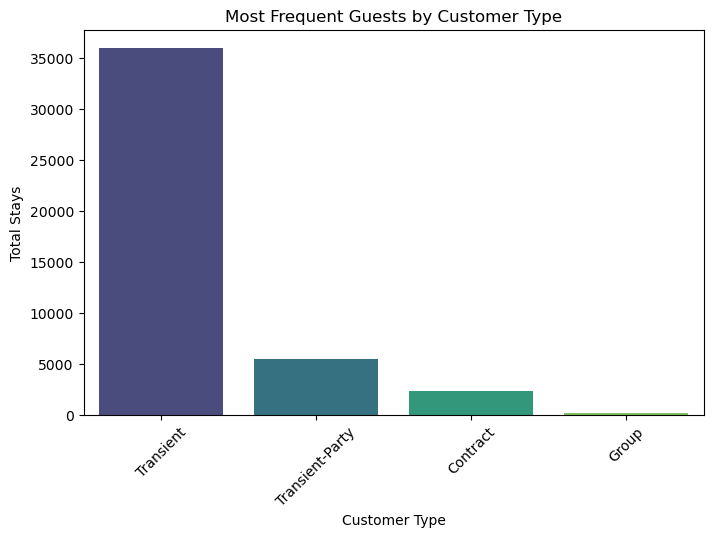

In [33]:
# consdering that the booking stay is for stays_in_weekend_nights and stays_in_week_nights
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

most_frequent_guests = (df.groupby('customer_type')['total_stays'].sum().reset_index().sort_values(by='total_stays', ascending=False))

print("Most Frequent Guests:")
print(most_frequent_guests)
print("\n")
plt.figure(figsize=(8,5))
sns.barplot(data=most_frequent_guests, x='customer_type', y='total_stays', palette="viridis")
plt.title("Most Frequent Guests by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Stays")
plt.xticks(rotation=45)
plt.show()

## 4.4. Seasonal Booking Trends

Seasonal Booking Trends:
  arrival_month         hotel  booking_count
0         April    City Hotel           5079
1         April  Resort Hotel           2792
2        August    City Hotel           6591
3        August  Resort Hotel           4645
4      December    City Hotel           3013




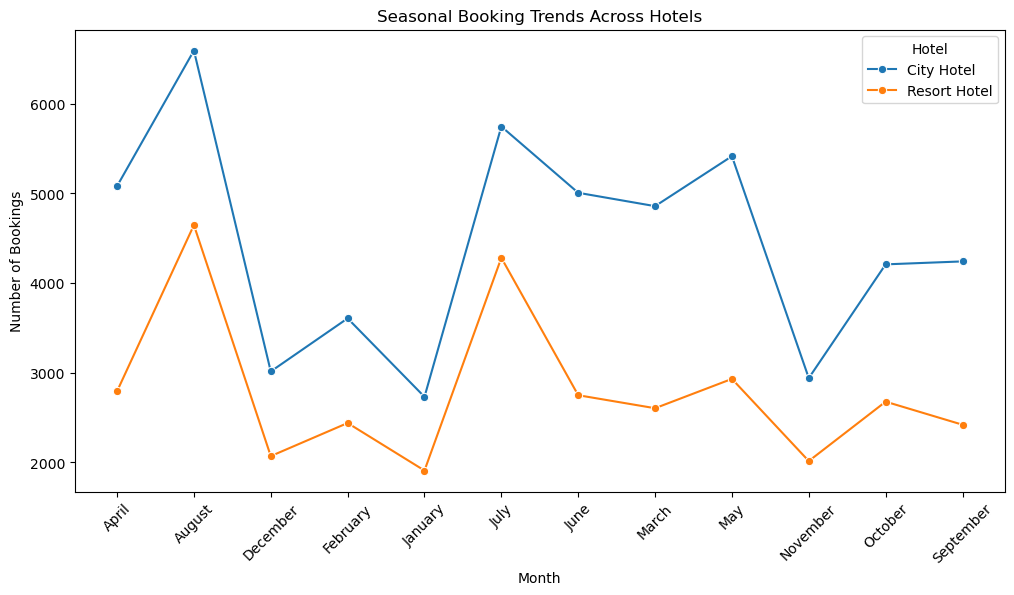

In [34]:
# to get month name
df['arrival_month'] = df['arrival_date_month']

seasonal_trends = (df.groupby(['arrival_month', 'hotel']).size().reset_index(name='booking_count'))

print("Seasonal Booking Trends:")
print(seasonal_trends.head())
print("\n")
plt.figure(figsize=(12,6))
sns.lineplot(data=seasonal_trends, x='arrival_month', y='booking_count', hue='hotel', marker="o")
plt.title("Seasonal Booking Trends Across Hotels")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.legend(title="Hotel")
plt.show()

# 5. Joins and Multi-Table Queries
## 5.1. Hotel-Specific Cancellation Rate

In [35]:
# group by hotel and calculate cancellation count + rate
hotel_cancellation = (df.groupby('hotel')['is_canceled'].agg(total_cancellations='sum', total_bookings='count').reset_index())
hotel_cancellation['cancellation_rate'] = (hotel_cancellation['total_cancellations'] / hotel_cancellation['total_bookings'])

print(hotel_cancellation)

          hotel  total_cancellations  total_bookings  cancellation_rate
0    City Hotel              16045.0           53422           0.300344
1  Resort Hotel               7946.0           33522           0.237038


## 5.2. Countries With High Cancellation Rates

In [36]:
# Group by country and calculate cancellations
country_cancellation = (df.groupby('country')['is_canceled'].agg(total_cancellations='sum', total_bookings='count').reset_index())

country_cancellation['cancellation_rate'] = (country_cancellation['total_cancellations'] / country_cancellation['total_bookings'])

high_risk_countries = country_cancellation.sort_values(by='cancellation_rate', ascending=False)

print(high_risk_countries.head()) 
#print(high_risk_countries.head(17))  #there are total 17 countries so for the display of all 

    country  total_cancellations  total_bookings  cancellation_rate
16      BEN                  3.0               3                1.0
118     MYT                  2.0               2                1.0
88      KHM                  1.0               1                1.0
83      JEY                  8.0               8                1.0
74      IMN                  2.0               2                1.0


In [37]:
# before moving ahead and bulit model we need encode categories
df = pd.get_dummies(df, drop_first=True).astype(int)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_month_December,arrival_month_February,arrival_month_January,arrival_month_July,arrival_month_June,arrival_month_March,arrival_month_May,arrival_month_November,arrival_month_October,arrival_month_September
73875,1,0,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73876,1,0,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73854,1,0,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73834,1,0,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73814,1,0,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
print(df.columns.tolist())

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'cumulative_cancellations', 'weighted_booking_score', 'cancellation_rate', 'hotel_rank', 'total_stays', 'hotel_Resort Hotel', 'arrival_date_month_August', 'arrival_date_month_December', 'arrival_date_month_February', 'arrival_date_month_January', 'arrival_date_month_July', 'arrival_date_month_June', 'arrival_date_month_March', 'arrival_date_month_May', 'arrival_date_month_November', 'arrival_date_month_October', 'arrival_date_month_September', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'country_AGO', 'country_AIA', 'country_ALB', 'country_AND', 'country_ARE'

# 6. Model Buliding
## 6.1. Split the Dataset

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [40]:
# taking is_canceled as target because reservation_status has more than 2 categories(No-show, cancelled and Check-out)
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

display(X_train.head(2))
display(X_test.head(2))
display(y_train.head(2))
display(y_test.head(2))

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,arrival_month_December,arrival_month_February,arrival_month_January,arrival_month_July,arrival_month_June,arrival_month_March,arrival_month_May,arrival_month_November,arrival_month_October,arrival_month_September
103769,0,2016,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39855,0,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,arrival_month_December,arrival_month_February,arrival_month_January,arrival_month_July,arrival_month_June,arrival_month_March,arrival_month_May,arrival_month_November,arrival_month_October,arrival_month_September
90023,0,2016,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
97271,0,2016,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


103769    0
39855     0
Name: is_canceled, dtype: int64

90023    0
97271    0
Name: is_canceled, dtype: int64

## 6.2. Experiments with models
>The following regression models are used to predict the Hotel Booking Status:<br>
●	Logistic Regression<br>
●	Decision Tree Classification<br>
●	Random Forest Classification<br>
●	Gradient Boosting Classification<br>
●	Support Vector Classification

In [42]:
import numpy as np
print(np.unique(y_train, return_counts=True))

(array([0, 1]), array([50362, 19193]))


In [43]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [44]:
# Make predictions on the test data
y_pred_log = log_reg.predict(X_test)
print(y_pred_log)

[0 0 0 ... 0 0 0]


In [45]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 0 1 ... 1 0 1]


In [47]:
#Random Forest Regression
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred_rf = rf.predict(X_test)
print(y_pred_rf)

[0 0 1 ... 1 0 1]


In [49]:
#Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=3,random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [50]:
y_pred_gb = gb.predict(X_test)
print(y_pred_gb)

[0 0 1 ... 1 0 1]


In [51]:
#Support Vector Machines
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [52]:
y_pred_svm = svm.predict(X_test)
print(y_pred_svm)

[0 0 0 ... 0 0 0]


## 6.3. Hyper-Parameter Tuning

In [53]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_reg = RandomForestClassifier(n_estimators=100, random_state=48)

In [54]:
params_grid={'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10]
}

In [55]:
grid_search= GridSearchCV(rf_reg, params_grid, n_jobs=-1, cv=5, scoring='accuracy')

In [56]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=48), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [57]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

In [58]:
crvf_reg=grid_search.best_estimator_
crvf_reg

RandomForestClassifier(n_estimators=50, random_state=48)

In [59]:
#value prediction
y_pred_gs=crvf_reg.predict(X_test)
y_pred_gs

array([0, 0, 1, ..., 1, 0, 1], shape=(17389,))

# 7. Model Testing
## 7.1. Evaluate Performance

In [60]:
# Acurracy of the models
from sklearn import metrics

print(f"\n Accuracy of Logistic Regression: {metrics.accuracy_score(y_test,y_pred_log)*100:.2f}%")
print(f"\n Accuracy of Decision Tree Regression: {metrics.accuracy_score(y_test,y_pred_dt)*100:.2f}%")
print(f"\n Accuracy of Random Forest Regression: {metrics.accuracy_score(y_test,y_pred_rf)*100:.2f}%")
print(f"\n Accuracy of Gradient Boosting Regression : {metrics.accuracy_score(y_test,y_pred_gb)*100:.2f}%")
print(f"\n Accuracy of  Support  Vector Machine: {metrics.accuracy_score(y_test,y_pred_svm)*100:.2f}%")
print(f"\n Accuracy of  Random Forest Regression using GridSearchCV: {metrics.accuracy_score(y_test,y_pred_gs)*100:.2f}%")


 Accuracy of Logistic Regression: 72.41%

 Accuracy of Decision Tree Regression: 100.00%

 Accuracy of Random Forest Regression: 100.00%

 Accuracy of Gradient Boosting Regression : 100.00%

 Accuracy of  Support  Vector Machine: 72.41%

 Accuracy of  Random Forest Regression using GridSearchCV: 100.00%


In [61]:
# Precision, F1-Score, Recall
from sklearn.metrics import classification_report

classification_rep_log = classification_report(y_test, y_pred_log)
print("Classification Report of Logistic Regression:\n", classification_rep_log)
print("\n")
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("Classification Report of Decision Tree:\n", classification_rep_dt)
print("\n")
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Classification Report of Random Forest:\n", classification_rep_rf)
print("\n")
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Classification Report of Gradient Boosting:\n", classification_rep_gb)
print("\n")
classification_rep_svm = classification_report(y_test, y_pred_svm)
print("Classification Report of Support Vector Machine:\n", classification_rep_svm)
print("\n")
classification_rep_gs = classification_report(y_test, y_pred_gs)
print("Classification Report of Random Forest Using GridSearchCV:\n", classification_rep_gs)
print("\n")

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84     12591
           1       0.00      0.00      0.00      4798

    accuracy                           0.72     17389
   macro avg       0.36      0.50      0.42     17389
weighted avg       0.52      0.72      0.61     17389



Classification Report of Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12591
           1       1.00      1.00      1.00      4798

    accuracy                           1.00     17389
   macro avg       1.00      1.00      1.00     17389
weighted avg       1.00      1.00      1.00     17389



Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12591
           1       1.00      1.00      1.00      4798

    accuracy                           1.00     1

C:\Users\TestFix123\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TestFix123\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TestFix123\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TestFix123\anaco

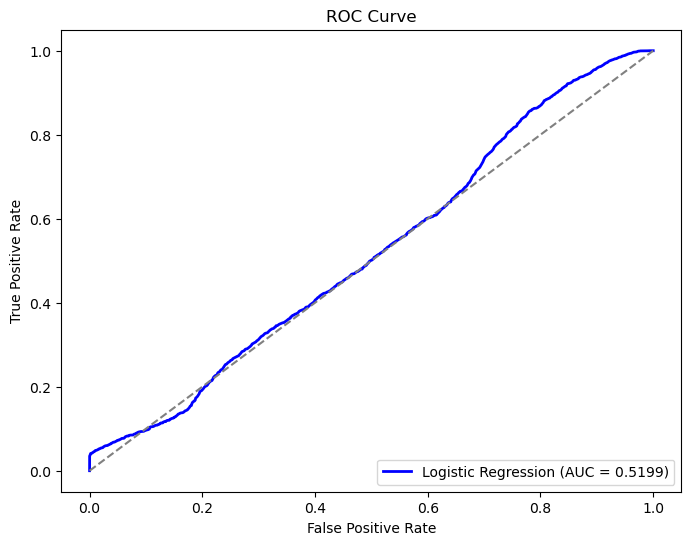

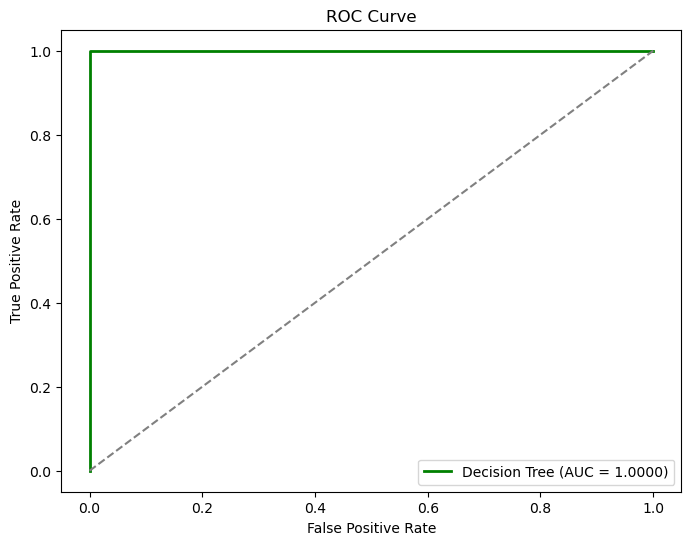

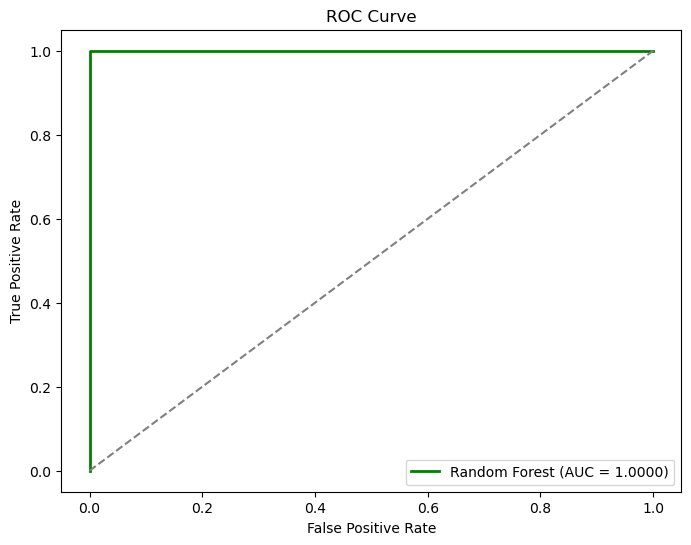

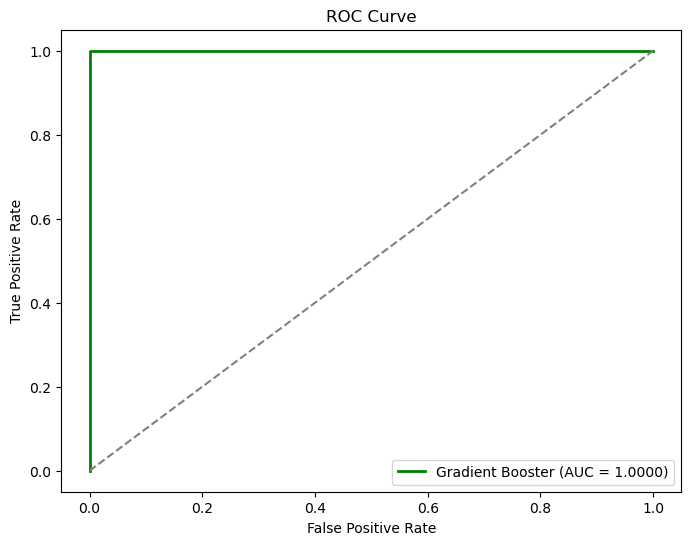

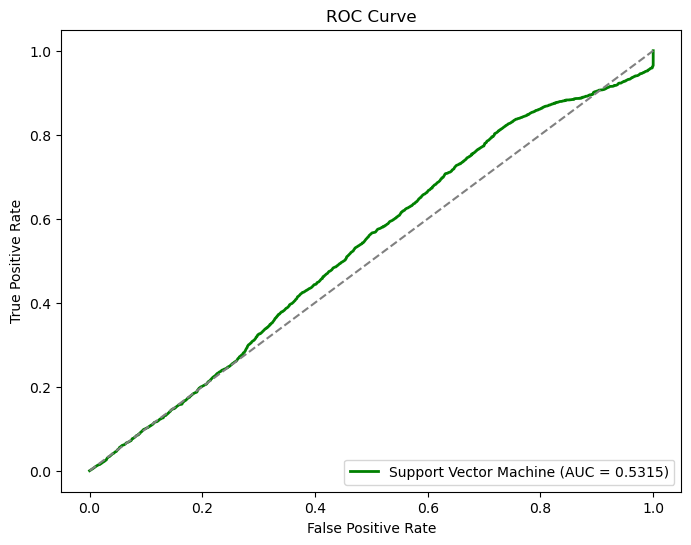

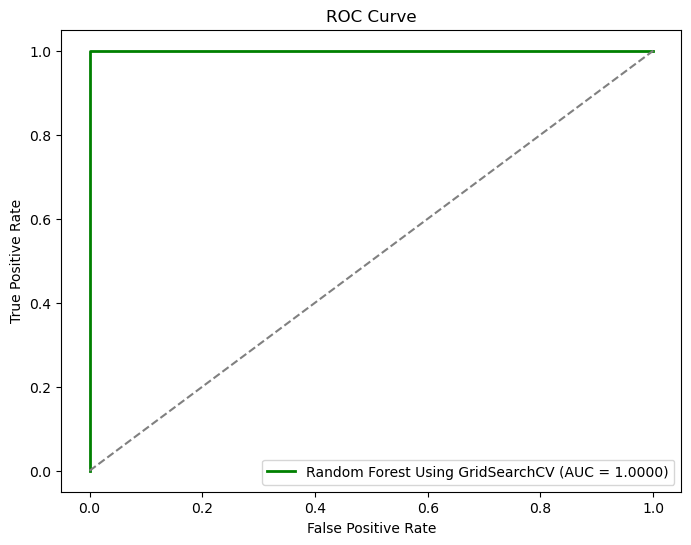

In [62]:
# ROC Curve for LOR
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# ROC Curve for DT
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# ROC Curve for RF
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# ROC Curve for GB
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Gradient Booster (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# ROC Curve for SVM
fpr, tpr, thresholds = roc_curve(y_test, svm.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Support Vector Machine (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# ROC Curve for RF_GSCV
fpr, tpr, thresholds = roc_curve(y_test, crvf_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Random Forest Using GridSearchCV (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## 7.2. Cross-Validation

In [63]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
#we will do it in loop
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),
    "SVM": SVC()
    # similarly you can add any model also Random Forest Using GridSearchCV; but I'm not mentioning it here because the kernel is taking 
    #more than 5-10 hrs to execute that
}

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# each model evaluation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    results[name] = (np.mean(scores), np.std(scores))
    print(f"{name}: Accuracy = {scores.mean():.4f} (+/- {scores.std():.4f})")


Logistic Regression: Accuracy = 0.7241 (+/- 0.0000)
Decision Tree: Accuracy = 1.0000 (+/- 0.0000)
Random Forest: Accuracy = 1.0000 (+/- 0.0000)
Gradient Boosting: Accuracy = 1.0000 (+/- 0.0000)
SVM: Accuracy = 0.7241 (+/- 0.0000)


## 7.3. Model Comaparision 

### ***Comparing the models we got to know that three models are providing us with 100% accuracy those are:***
>
● Decision Tree<br>
● Random Forest/ Random Forest Using GridSearchCV<br>
● Gradient Boosting<br>
>These three are the best model; the other two Logistic Regression and Support Vector Machine Provides us with less accuracy with the same dataset

# __Thank You__